# Fractional Brownian Motion
Fractional brownian motion parameter scans. Fractional brownian motion is defined by the stochastic integral,</br>

$
\begin{align}
Z^H_t = \frac{1}{C^H} \int_{-\infty}^{\infty} \left[ (t-s)^{H-\frac{1}{2}}_+ - (-s)^{H-\frac{1}{2}}_+ \right] dB_s
\end{align}
$

where, </br>

$
\begin{align}
C^H = \Bigg\{ \int_{-\infty}^0  \left[ (t-s)^{H-\frac{1}{2}}_+ - (-s)^{H-\frac{1}{2}}_+ \right] ds + \frac{1}{2H} \Bigg\} ^{\frac{1}{2}}
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Sample Generation

In [2]:
def fft_samples(H_vals, npts):
    samples = numpy.array([fbm.generate_fft(H_vals[0], npts)])
    for H in H_vals[1:]:
        samples = numpy.append(samples, numpy.array([fbm.generate_fft(H, npts)]), axis=0)
    return samples

def cholesky_samples(H_vals, npts):
    samples = numpy.array([fbm.generate_cholesky(H_vals[0], npts)])
    for H in H_vals[1:]:
        samples = numpy.append(samples, numpy.array([fbm.generate_cholesky(H, npts)]), axis=0)
    return samples

## Fractional Brownian Noise

In [3]:
Δt = 1.0
npts = 1000
time = numpy.linspace(0.0, float(npts)*Δt, npts + 1)
dB = bm.noise(npts+1)

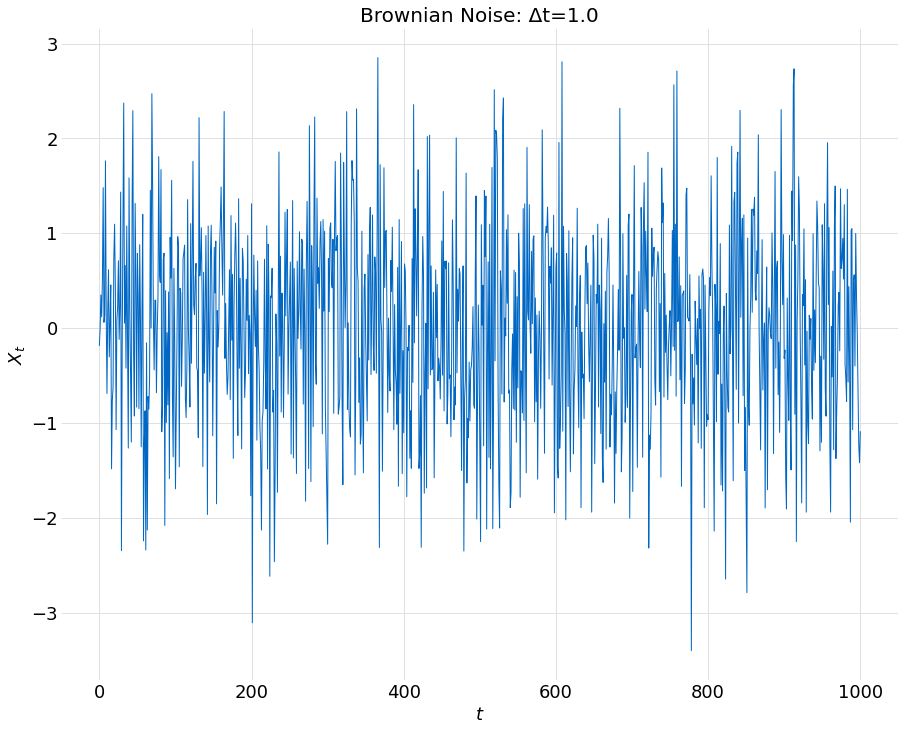

In [4]:
title = f"Brownian Noise: Δt={Δt}"
plots.time_series(dB, time, title)

### Cholesky Fractional Brownian Noise
This noise is created using the Cholesky algorithm. Fractional brownian motion is created by summing fractional nrownian noise.

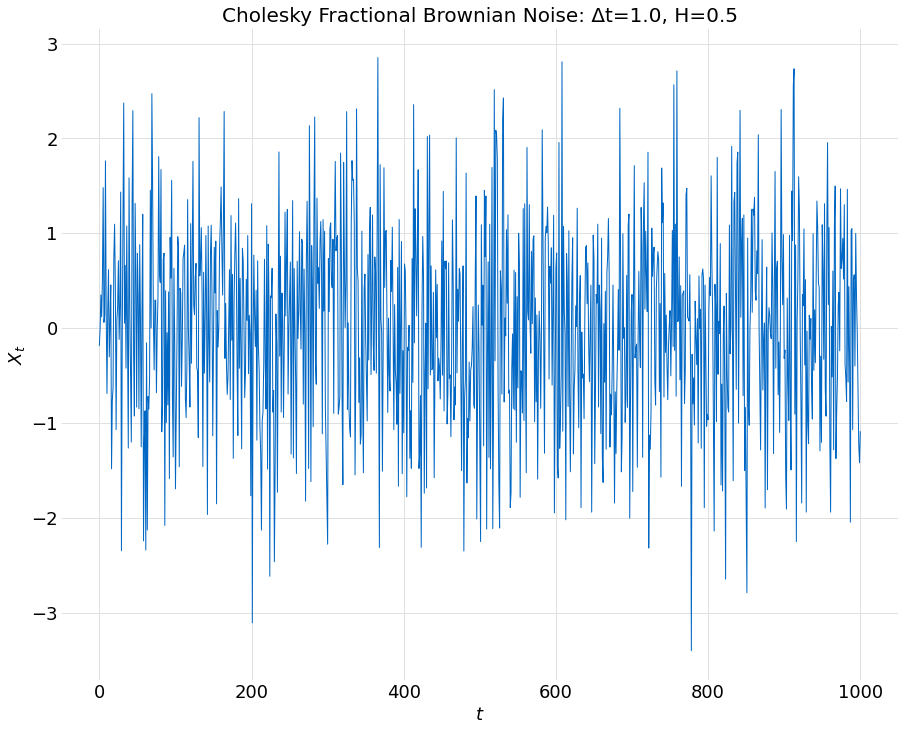

In [5]:
H = 0.5
samples = fbm.cholesky_noise(H, npts, dB=dB)
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

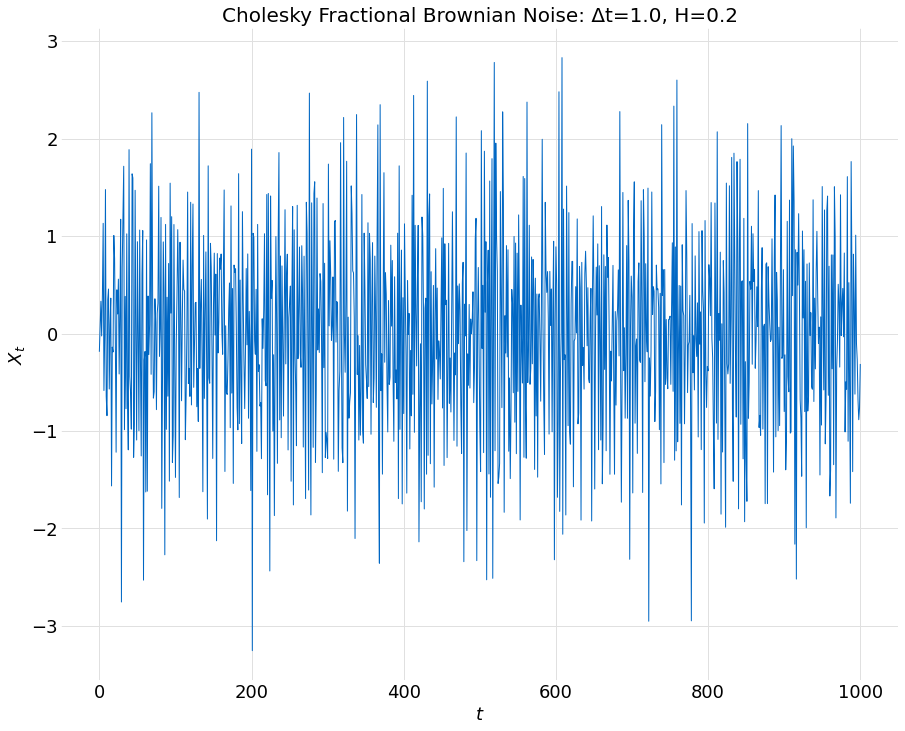

In [6]:
H = 0.2
samples = fbm.cholesky_noise(H, npts, dB=dB)
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

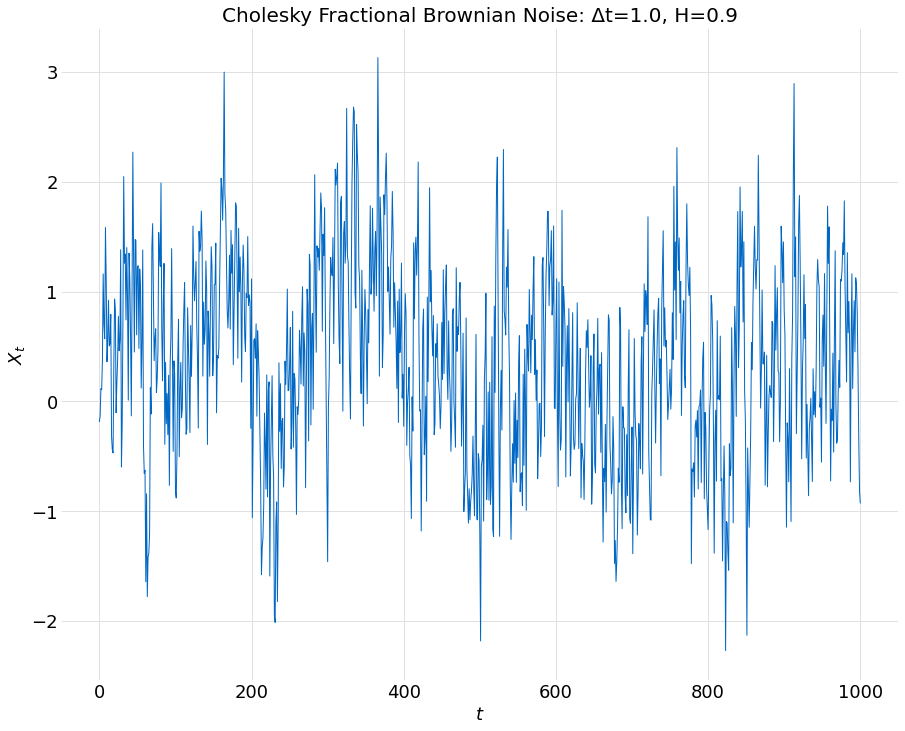

In [7]:
H = 0.9
samples = fbm.cholesky_noise(H, npts, dB=dB)
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

### FFT Fractional Brownian Noise
This noise is created using the FFT algorothm. Fractional brownian motion is created by summing fractional nrownian noise.

In [8]:
Δt = 1.0
npts = 1024
time = numpy.linspace(0.0, float(npts)*Δt, npts)
dB = bm.noise(2*npts)

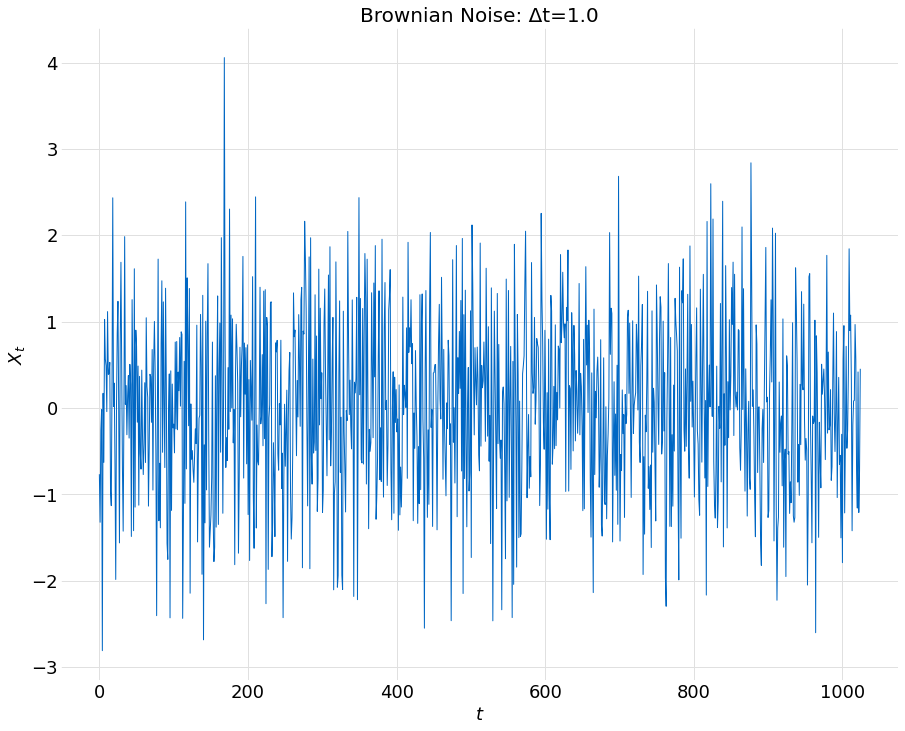

In [9]:
title = f"Brownian Noise: Δt={Δt}"
plots.time_series(dB[:npts], time, title)

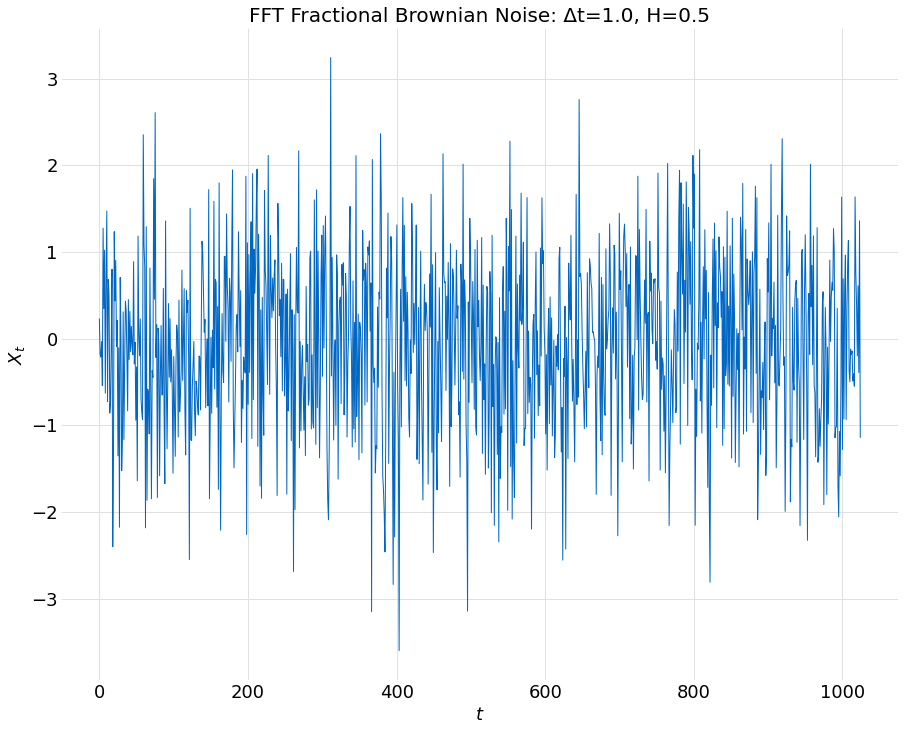

In [10]:
H = 0.5
samples = fbm.fft_noise(H, npts, dB=dB)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

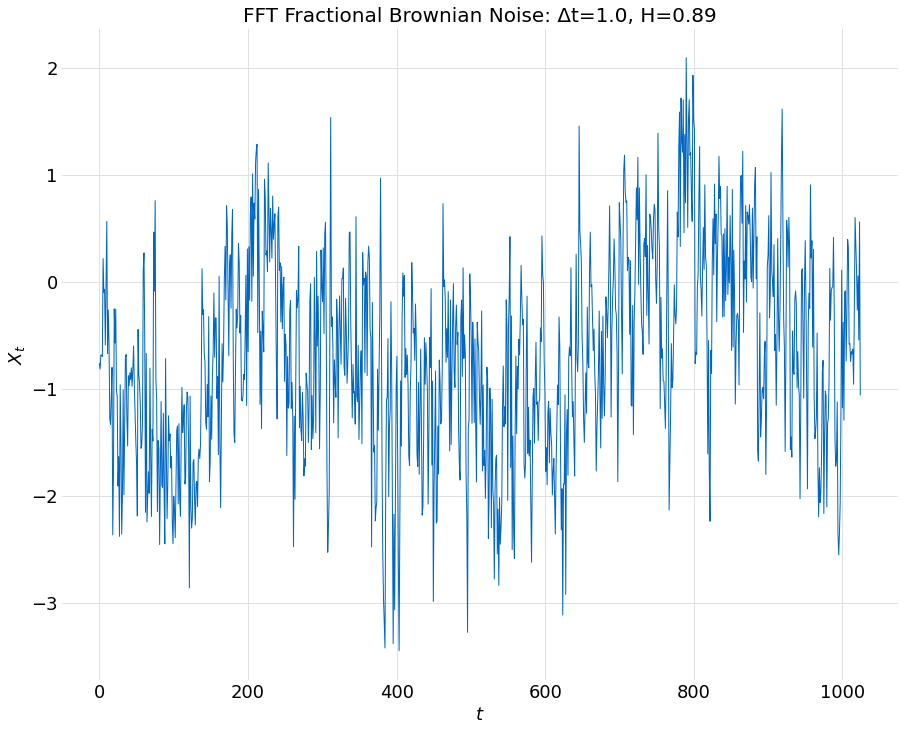

In [11]:
H = 0.89
samples = fbm.fft_noise(H, npts, dB=dB)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

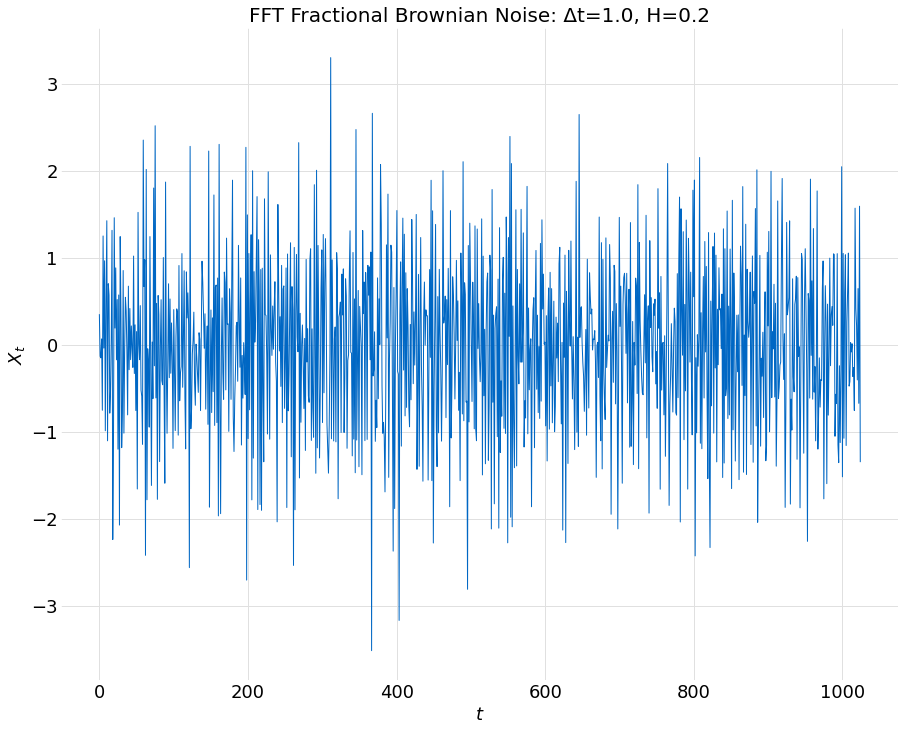

In [12]:
H = 0.2
samples = fbm.fft_noise(H, npts, dB=dB)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

## Cholesky Fractional Brownian Motion
Brownian motion created using the Cholesky method. This method is slower than the FFT method but performs well for all values of H.

In [13]:
Δt = 1.0
npts = 1000
time = numpy.linspace(0.0, float(npts)*Δt, npts + 1)

In [14]:
H_vals = [0.55, 0.6, 0.7, 0.8, 0.9, 0.92]
samples = cholesky_samples(H_vals, npts)

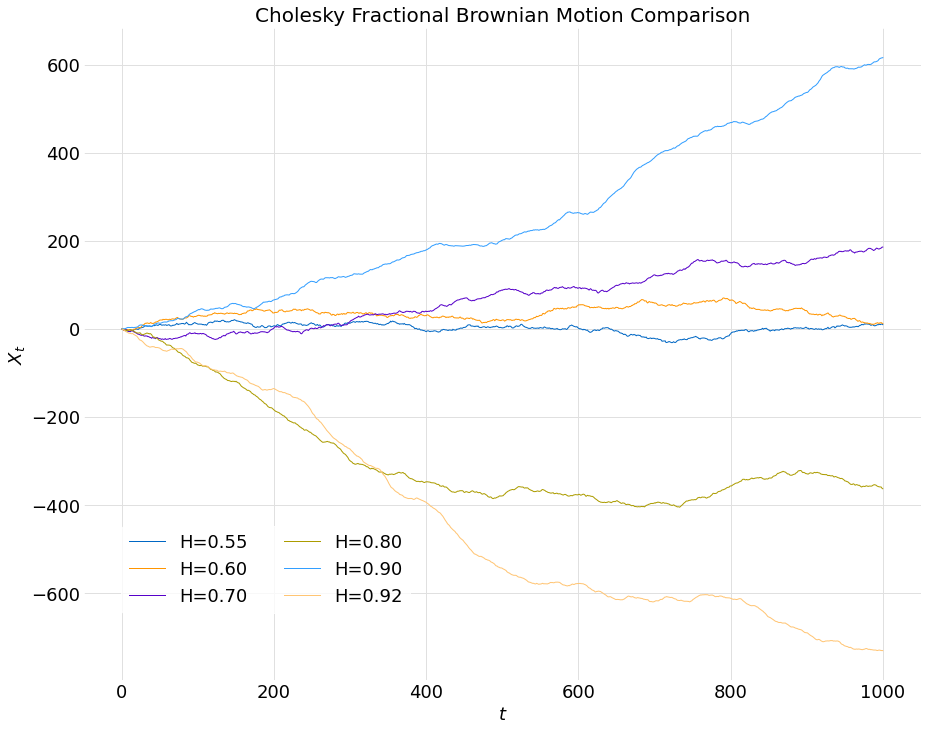

In [15]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.25), title)

In [16]:
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5]
samples = cholesky_samples(H_vals, npts)

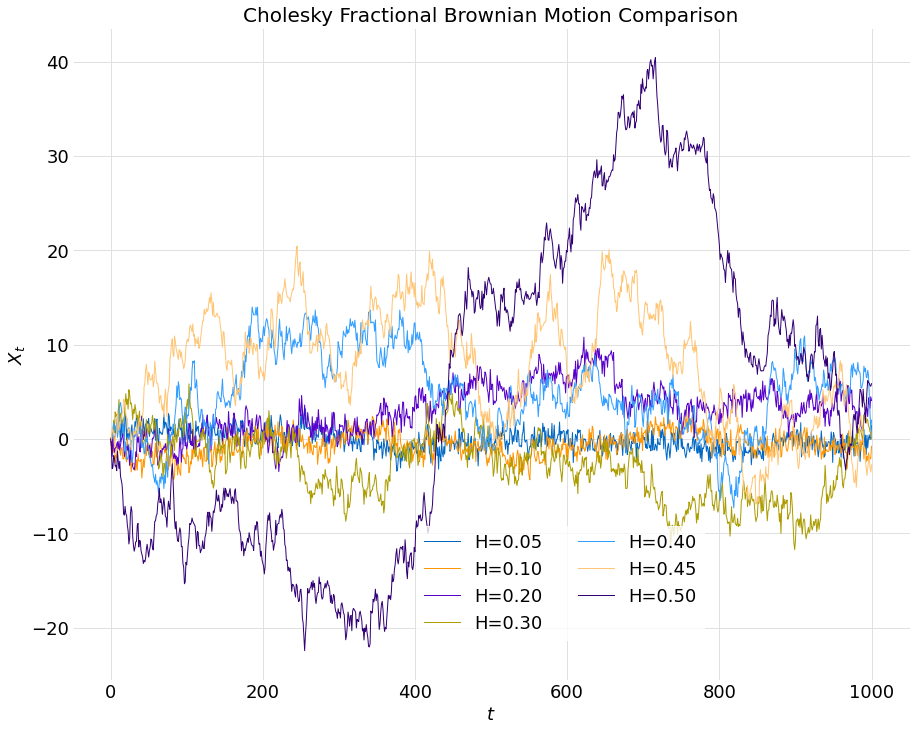

In [17]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.25), title)

## FFT Brownian Motion
Fractional brownian motion created using the FFT method. This mthod is the fastest and will be used in analysis going forward but has problems for H near 1.

In [18]:
Δt = 1.0
npts = 1024
time = numpy.linspace(0.0, float(npts)*Δt, npts)

In [19]:
H_vals = [0.55, 0.6, 0.7, 0.8, 0.89]
samples = fft_samples(H_vals, npts)

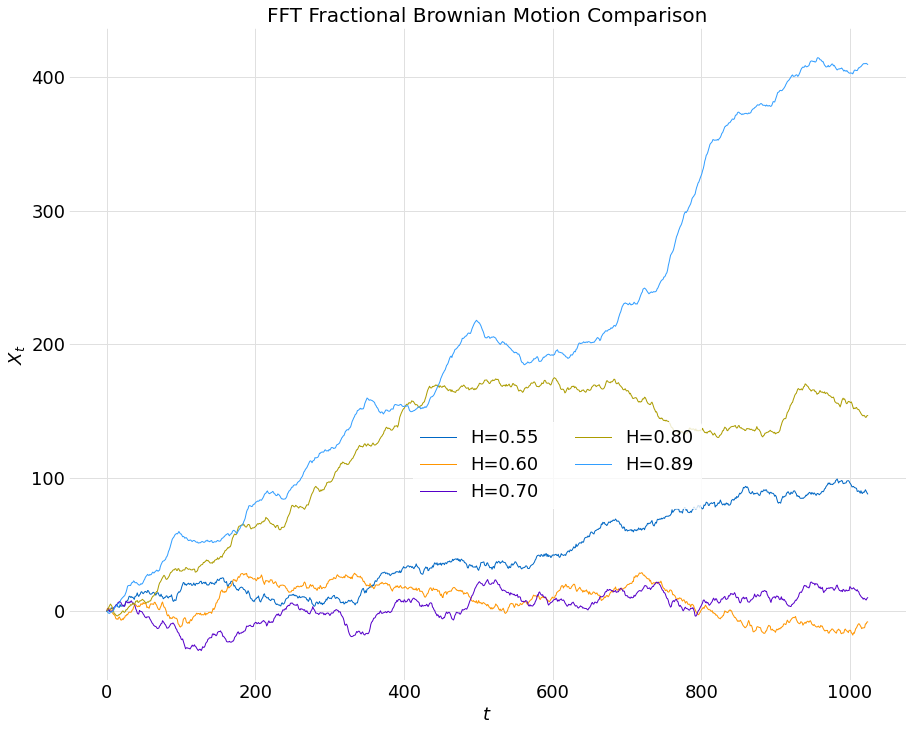

In [20]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"FFT Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.25), title)

In [21]:
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
samples = fft_samples(H_vals, npts)

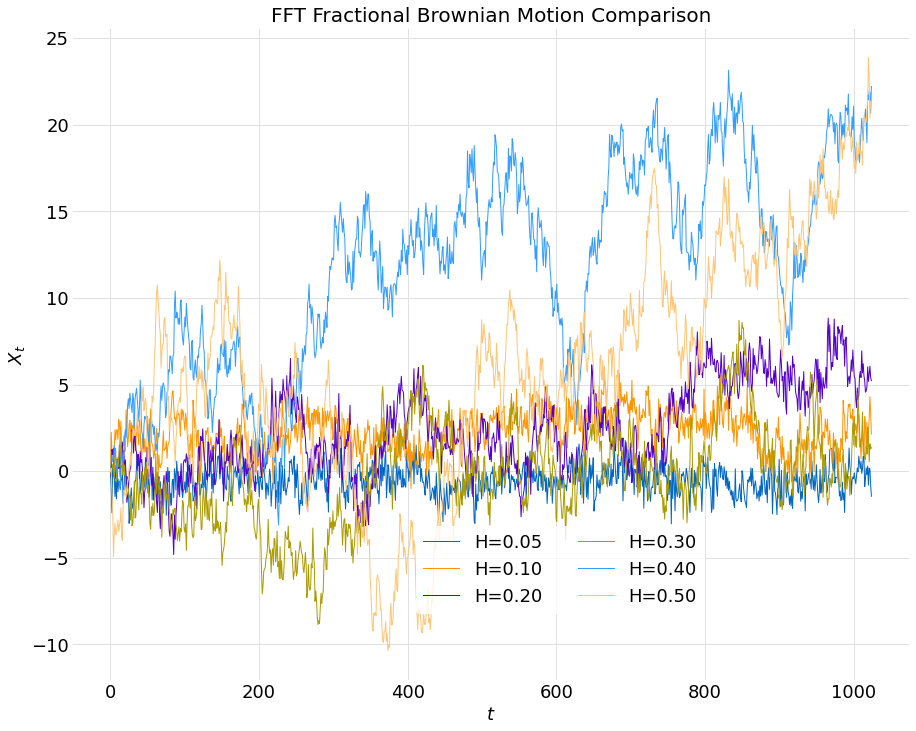

In [22]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"FFT Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.25), title)

### H Near 1
The FFT method has issues for values of H near one. `H=0.91` is the largest value for which a solution can be obtained.</br> The Cholesky method, though slower, can obtain solutions in this range as shown below 

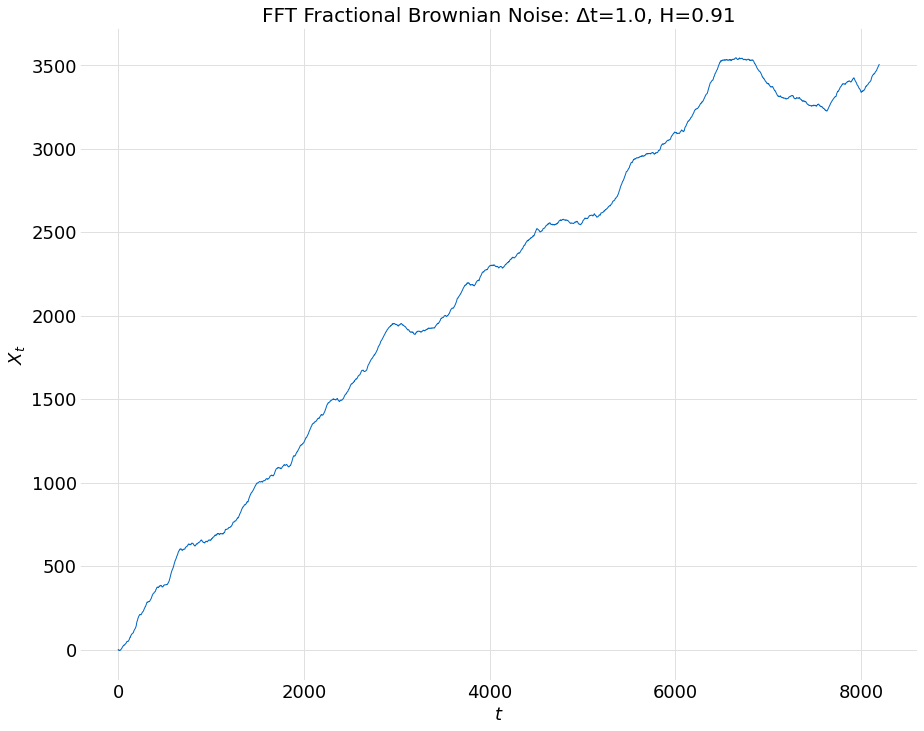

In [23]:
H = 0.91
npts = 8196
time = numpy.linspace(0.0, float(npts)*Δt, npts)
samples = fbm.generate_fft(H, npts)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

In [24]:
npts = 1024
H_vals = [0.9, 0.95, 0.99]
samples = cholesky_samples(H_vals, npts)

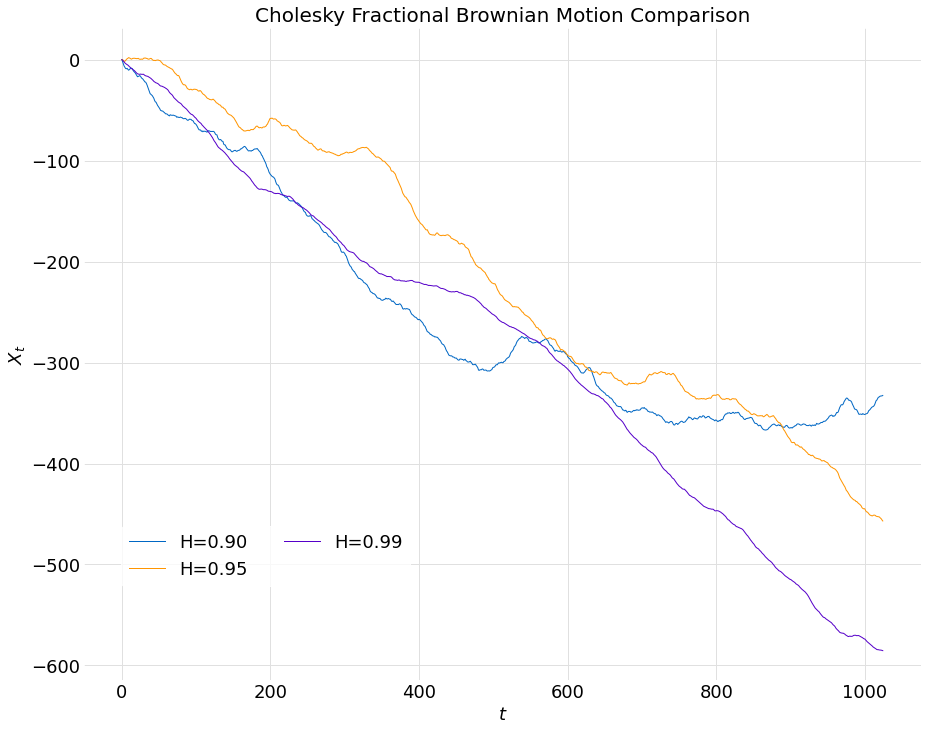

In [25]:
time = numpy.linspace(0.0, float(npts)*Δt, npts+1)
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.25), title)